<a href="https://colab.research.google.com/github/itz-john/loan_prediction/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df=pd.read_csv('/content/drive/MyDrive/train_u6lujuX_CVtuZ9i.csv')

In [8]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: >

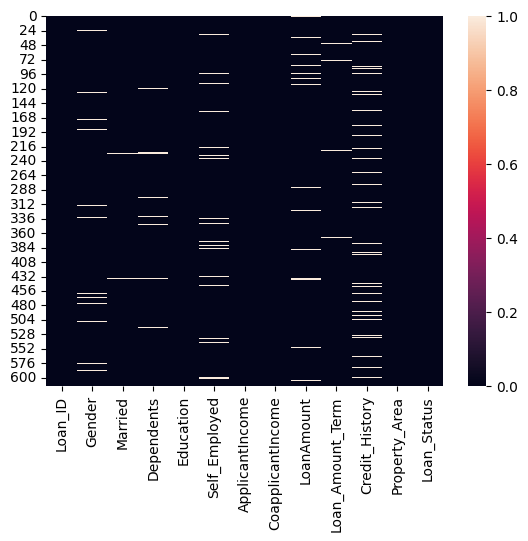

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.drop(['Loan_ID'], axis=1, inplace=True)

In [11]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df.shape

(614, 12)

In [13]:
df.dropna(axis=0, inplace=True)

In [14]:
df.shape

(480, 12)

In [15]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [16]:
df['Gender'].replace(to_replace='Male', value=0, inplace=True)
df['Gender'].replace(to_replace='Female', value=1, inplace=True)
df['Education'].replace(to_replace='Graduate', value=0, inplace=True)
df['Education'].replace(to_replace='Not Graduate', value=1, inplace=True)
df['Self_Employed'].replace(to_replace='Yes', value=1, inplace=True)
df['Self_Employed'].replace(to_replace='No', value=0, inplace=True)
df['Property_Area'].replace(to_replace='Rural', value=0, inplace=True)
df['Property_Area'].replace(to_replace='Semiurban', value=1, inplace=True)
df['Property_Area'].replace(to_replace='Urban', value=2, inplace=True)
df['Loan_Status'].replace(to_replace='Y', value=1, inplace=True)
df['Loan_Status'].replace(to_replace='N', value=0, inplace=True)

In [17]:
df['Married'].replace(to_replace='Yes', value=1, inplace=True)
df['Married'].replace(to_replace='No', value=0, inplace=True)
df['Dependents'].replace(to_replace='3+', value=4, inplace=True)

In [18]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,0,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [19]:
X=df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

<ipython-input-20-08b6fa32c156>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

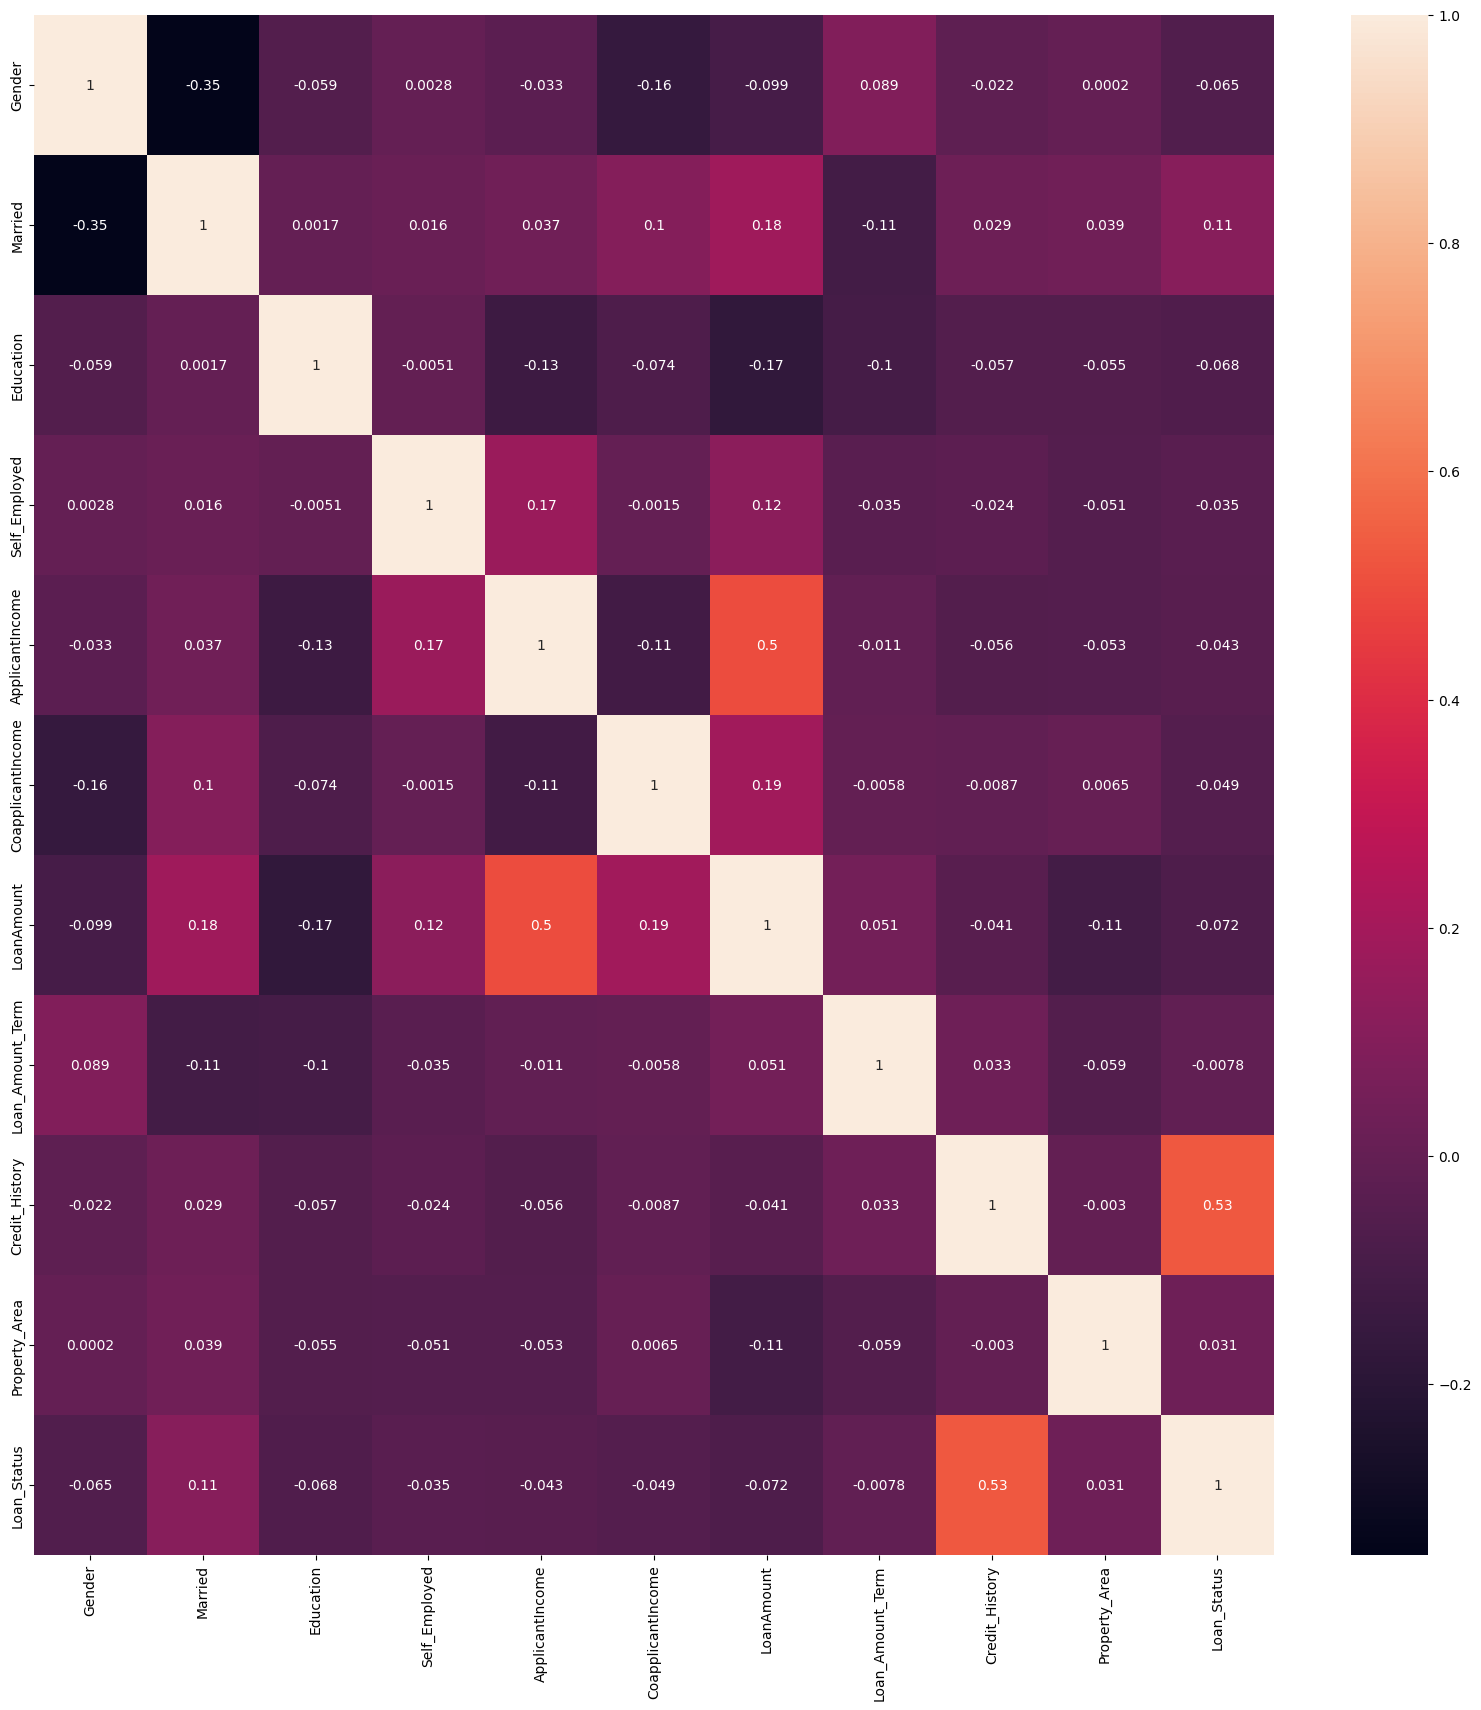

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

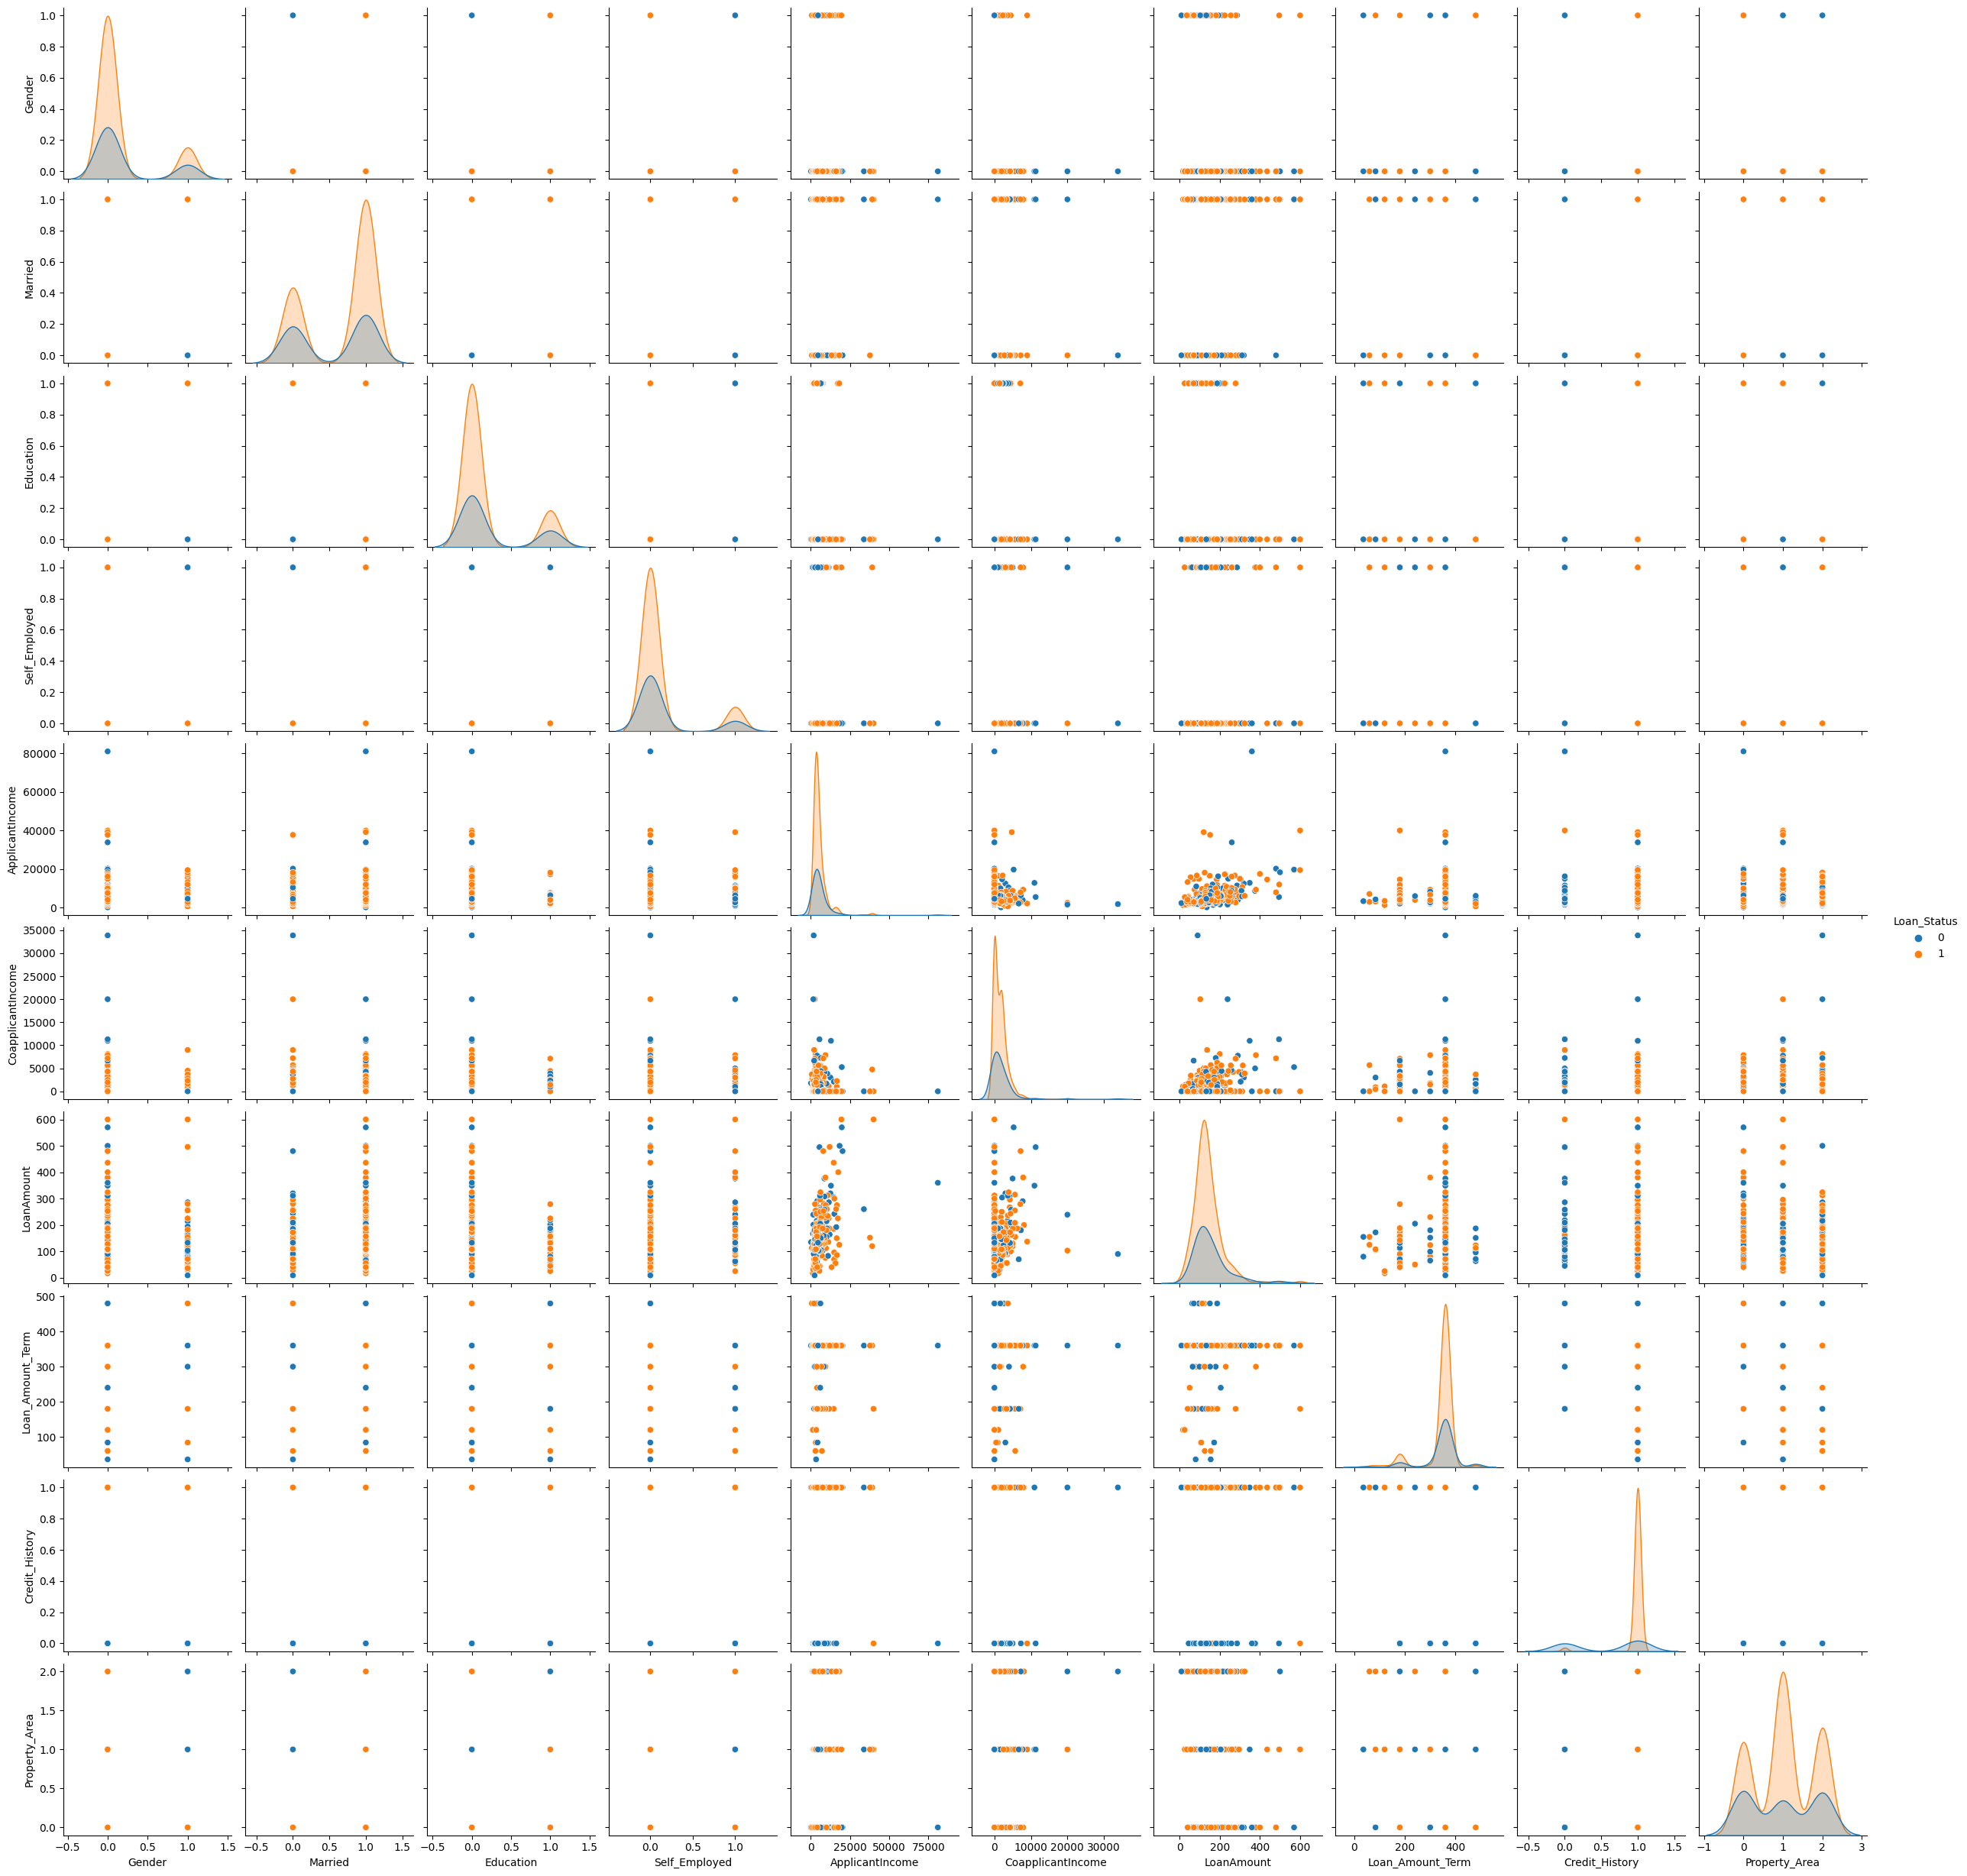

In [21]:
sns.pairplot(data=df, hue='Loan_Status')

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l2','elasticnet'], 'C':[1,2,3,4,5,6,10,20,30,40,50], 'max_iter':[100,200,300]}

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
clf_regressor=GridSearchCV(clf, param_grid=parameter, scoring='accuracy', cv=5)

In [ ]:
clf_regressor.fit(X_train,y_train)

In [ ]:
GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l2', 'elasticnet']},
             scoring='accuracy')

In [29]:
y_pred=clf_regressor.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, classification_report
acc= accuracy_score(y_test, y_pred)
acc

0.7847222222222222

In [31]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.37      1.00      0.54        18
           1       1.00      0.75      0.86       126

    accuracy                           0.78       144
   macro avg       0.68      0.88      0.70       144
weighted avg       0.92      0.78      0.82       144

